In [1]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import matplotlib.cm as cm
from scipy.signal import savgol_filter
from scipy import stats

batch1 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())

batch2 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

numBat2 = len(batch2.keys())

batch3 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}

In [27]:
bat_dict['b1c0']['summary']['IR']


dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])

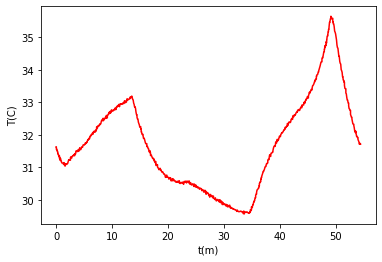

In [15]:
plt.plot(bat_dict['b1c0']['cycles']['1']['t'],bat_dict['b1c0']['cycles']['1']['T'],c='red')

plt.xlabel('t(m)')
plt.ylabel('T(C)')
plt.show()

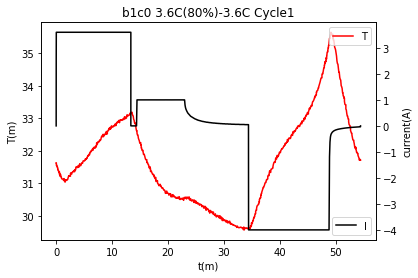

In [39]:
fig ,ax1 =plt.subplots()
ax1.plot(bat_dict['b1c0']['cycles']['1']['t'],bat_dict['b1c0']['cycles']['1']['T'],c='red',label='T')
ax1.set_title('b1c0 3.6C(80%)-3.6C Cycle1')
ax1.set_xlabel('t(m)')
ax1.set_ylabel('T(m)')
ax1.legend(loc='upper right')
ax2=ax1.twinx()
ax2.plot(bat_dict['b1c0']['cycles']['1']['t'],bat_dict['b1c0']['cycles']['1']['I'],c='black',label='I')
ax2.set_ylabel('current(A)')
ax2.legend(loc='lower right')
plt.show()

In [45]:
bat_dict['b1c0']['cycles']['1']['t']

array([0.00000000e+00, 2.41666667e-03, 2.91166667e-03, ...,
       5.43651150e+01, 5.43726733e+01, 5.43748267e+01])

array([0.00000000e+00, 4.83333333e-03, 5.82333333e-03, ...,
       1.08730230e+02, 1.08745347e+02, 1.08749653e+02])

In [ ]:
bat_dict['b1c0']['cycles']['1']['t'], bat_dict['b1c0']['cycles']['1']['T']

for i in 
fig ,ax1 =plt.subplots()
ax1.plot(bat_dict['b1c0']['cycles']['1']['t'],bat_dict['b1c0']['cycles']['1']['T'],c='red',label='T')
ax1.set_title('b1c0 3.6C(80%)-3.6C Cycle1')
ax1.set_xlabel('t(m)')
ax1.set_ylabel('T(m)')
ax1.legend(loc='upper right')
ax2=ax1.twinx()
ax2.plot(bat_dict['b1c0']['cycles']['1']['t'],bat_dict['b1c0']['cycles']['1']['I'],c='black',label='I')
ax2.set_ylabel('current(A)')
ax2.legend(loc='lower right')
plt.show()

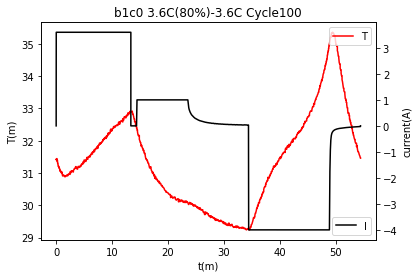

In [40]:
fig ,ax1 =plt.subplots()
ax1.plot(bat_dict['b1c0']['cycles']['100']['t'],bat_dict['b1c0']['cycles']['100']['T'],c='red',label='T')
ax1.set_title('b1c0 3.6C(80%)-3.6C Cycle100')
ax1.set_xlabel('t(m)')
ax1.set_ylabel('T(m)')
ax1.legend(loc='upper right')
ax2=ax1.twinx()
ax2.plot(bat_dict['b1c0']['cycles']['100']['t'],bat_dict['b1c0']['cycles']['100']['I'],c='black',label='I')
ax2.set_ylabel('current(A)')
ax2.legend(loc='lower right')
plt.show()

In [43]:
bat_dict['b1c11']['charge_policy']

'5.4C(50%)-3C'

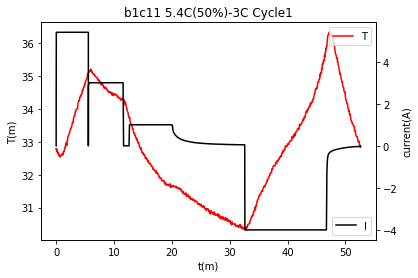

In [44]:
fig ,ax1 =plt.subplots()
ax1.plot(bat_dict['b1c11']['cycles']['1']['t'],bat_dict['b1c11']['cycles']['1']['T'],c='red',label='T')
ax1.set_title('b1c11 5.4C(50%)-3C Cycle1')
ax1.set_xlabel('t(m)')
ax1.set_ylabel('T(C)')
ax1.legend(loc='upper right')
ax2=ax1.twinx()
ax2.plot(bat_dict['b1c11']['cycles']['1']['t'],bat_dict['b1c11']['cycles']['1']['I'],c='black',label='I')
ax2.set_ylabel('current(A)')
ax2.legend(loc='lower right')
plt.show()

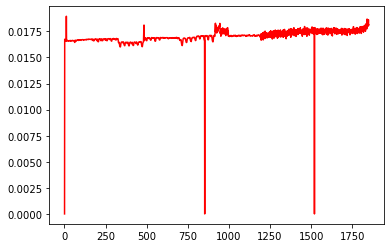

In [35]:
plt.plot(bat_dict['b1c0']['summary']['cycle'],bat_dict['b1c0']['summary']['IR'],c='red')


In [37]:
Cycle=bat_dict['b1c0']['summary']['cycle']
IR=bat_dict['b1c0']['summary']['IR']
def DelZero(IR,Cycle):
    wherezero=np.where(IR==0)
    delzeroIR=np.delete(IR,wherezero)
    delzeroCycle=np.delete(Cycle,wherezero)
    return delzeroIR , delzeroCycle

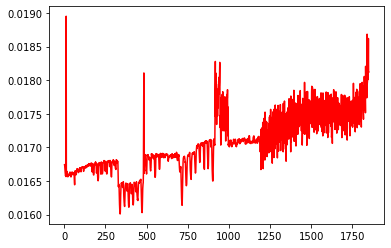

In [38]:
IR_del,Cycle_del = DelZero(IR,Cycle)
plt.plot(Cycle_del,IR_del,c='red')

In [ ]:
# 아래는 판다스 연습

In [48]:
import numpy as np
import os
import pandas as pd
import matplotlib.cm as cm
from matplotlib import pyplot as plt
import tkinter
from tkinter import filedialog
root = tkinter.Tk()
root.withdraw()
path = filedialog.askdirectory(parent=root,initialdir="D:/ML/data/1to48/",title='raw 파일 경로')

In [19]:
import tkinter as tk
import tkinter.filedialog as fd

root = tk.Tk()
root.withdraw()

path = fd.askopenfilename(parent=root,initialdir="D:/ML/data/1to48/",title='파일 선택')
print(path)

D:/ML/data/1to48/2017-05-12_3_6C-80per_3_6C_CH1.csv


In [20]:
import pandas as pd
data = pd.read_csv(path)
data

,Data_Point,Test_Time,DateTime,Step_Time,Step_Index,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature
0,0,10.0040,1.494645e+09,10.0040,0.0,0.0,0.000000,3.301014,0.000000,0.0,0.000000,0.0,0.000016,0.021001,30.490789
1,1,10.0041,1.494645e+09,10.0041,0.0,0.0,0.000000,3.301014,0.000000,0.0,0.000000,0.0,0.000016,0.021001,30.490789
2,2,20.0027,1.494645e+09,20.0027,0.0,0.0,0.000000,3.300957,0.000000,0.0,0.000000,0.0,-0.000009,0.021001,30.467545
3,3,30.0010,1.494645e+09,30.0010,0.0,0.0,0.000000,3.300960,0.000000,0.0,0.000000,0.0,-0.000007,0.021001,30.467545
4,4,30.0011,1.494645e+09,30.0011,0.0,0.0,0.000000,3.300960,0.000000,0.0,0.000000,0.0,-0.000007,0.021001,30.456642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904141,1904141,587119.1053,1.498503e+09,112.3665,5.0,1190.0,3.959965,3.371268,0.123220,0.0,0.397368,0.0,0.000805,0.017089,31.647547
1904142,1904142,587119.1054,1.498503e+09,112.3666,5.0,1190.0,3.959965,3.371268,0.123220,0.0,0.397368,0.0,0.000805,0.017089,31.683165
1904143,1904143,587124.1107,1.498503e+09,117.3719,5.0,1190.0,3.961073,3.374354,0.128731,0.0,0.415956,0.0,0.000553,0.017089,31.700298
1904144,1904144,587128.3749,1.498503e+09,121.6361,5.0,1190.0,3.960319,3.377114,0.133421,0.0,0.431788,0.0,0.000553,0.017089,31.700298


In [21]:
columns_data=[item for item in data.columns]
columns_data

['Data_Point',
 'Test_Time',
 'DateTime',
 'Step_Time',
 'Step_Index',
 'Cycle_Index',
 'Current',
 'Voltage',
 'Charge_Capacity',
 'Discharge_Capacity',
 'Charge_Energy',
 'Discharge_Energy',
 'dV/dt',
 'Internal_Resistance',
 'Temperature']

In [31]:
columns_data[6]

'Current'

In [29]:
columns_data[1]

'Test_Time'

In [33]:
data.loc[0,['DateTime']]

DateTime    1.494645e+09
Name: 0, dtype: float64

In [37]:
data.loc[:,['DateTime']]

,DateTime
0,1.494645e+09
1,1.494645e+09
2,1.494645e+09
3,1.494645e+09
4,1.494645e+09
...,...
1904141,1.498503e+09
1904142,1.498503e+09
1904143,1.498503e+09
1904144,1.498503e+09


In [63]:
test=data.loc[:,['DateTime']]-data.loc[0,['DateTime']]

In [69]:
test.iloc[0,0]

0.0

In [43]:
data.loc[:,['Voltage']] 

,Voltage
0,3.301014
1,3.301014
2,3.300957
3,3.300960
4,3.300960
...,...
1904141,3.371268
1904142,3.371268
1904143,3.374354
1904144,3.377114


In [62]:
len(data.loc[:,['Voltage']] )

1904146

In [53]:
V=data.loc[:,['Voltage']] 
I=data.loc[:,['Current']]
import numpy as np
np.array(V)*np.array(I)

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [13.36606377],
       [13.37445162],
       [13.37445162]])

In [54]:
iscycledata=data['Cycle_Index']==1
cycledata=data[iscycledata]
cycledata

,Data_Point,Test_Time,DateTime,Step_Time,Step_Index,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature
607046,607046,5091.5217,1.494661e+09,0.0029,12.0,1.0,0.000000,2.024098,0.000000,0.000000,0.000000,0.00000,-0.000498,0.017168,31.571444
607047,607047,5091.6739,1.494661e+09,0.0535,5.0,1.0,0.237664,2.036588,0.000003,0.000000,0.000005,0.00000,0.022901,0.017168,31.571444
607048,607048,5091.6963,1.494661e+09,0.0759,5.0,1.0,0.395741,2.048645,0.000003,0.000000,0.000005,0.00000,0.022901,0.017168,31.571444
607049,607049,5091.7205,1.494661e+09,0.1001,5.0,1.0,0.514493,2.059839,0.000003,0.000000,0.000005,0.00000,0.022901,0.017168,31.571444
607050,607050,5091.7355,1.494661e+09,0.1151,5.0,1.0,0.633263,2.072803,0.000003,0.000000,0.000005,0.00000,0.022901,0.017168,31.571444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608131,608131,8353.0721,1.494664e+09,1200.0040,10.0,1.0,-0.038569,1.999818,1.069269,1.069159,3.677503,3.25421,-0.000144,0.016765,31.632496
608132,608132,8353.1335,1.494664e+09,0.0027,11.0,1.0,-0.038569,2.002199,1.069269,1.069159,3.677503,3.25421,-0.000144,0.016765,31.632496
608133,608133,8353.5430,1.494664e+09,0.4122,11.0,1.0,-0.038569,2.012267,1.069269,1.069159,3.677503,3.25421,-0.000144,0.016765,31.632496
608134,608134,8353.9910,1.494664e+09,0.8602,11.0,1.0,-0.038569,2.022360,1.069269,1.069159,3.677503,3.25421,-0.000144,0.016765,31.632496


In [57]:
cycledata.iloc[0,2]

1494660950.6024

In [61]:
len(cycledata.iloc[:,2])

113103

In [58]:
iscycledata=data['Cycle_Index']==0
cycledata=data[iscycledata]
cycledata

,Data_Point,Test_Time,DateTime,Step_Time,Step_Index,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature
0,0,10.0040,1.494645e+09,10.0040,0.0,0.0,0.00000,3.301014,0.000000,0.000000,0.000000,0.000000,0.000016,0.021001,30.490789
1,1,10.0041,1.494645e+09,10.0041,0.0,0.0,0.00000,3.301014,0.000000,0.000000,0.000000,0.000000,0.000016,0.021001,30.490789
2,2,20.0027,1.494645e+09,20.0027,0.0,0.0,0.00000,3.300957,0.000000,0.000000,0.000000,0.000000,-0.000009,0.021001,30.467545
3,3,30.0010,1.494645e+09,30.0010,0.0,0.0,0.00000,3.300960,0.000000,0.000000,0.000000,0.000000,-0.000007,0.021001,30.467545
4,4,30.0011,1.494645e+09,30.0011,0.0,0.0,0.00000,3.300960,0.000000,0.000000,0.000000,0.000000,-0.000007,0.021001,30.456642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607041,607041,5090.4392,1.494661e+09,1200.0109,10.0,0.0,-0.03508,2.000048,1.161226,1.678763,3.955011,5.166876,-0.000498,0.017168,31.571444
607042,607042,5090.5045,1.494661e+09,0.0058,11.0,0.0,-0.03508,2.002172,1.161226,1.678763,3.955011,5.166878,-0.000498,0.017168,31.571444
607043,607043,5090.9614,1.494661e+09,0.4627,11.0,0.0,-0.03508,2.012287,1.161226,1.678763,3.955011,5.166878,-0.000498,0.017168,31.571444
607044,607044,5091.4703,1.494661e+09,0.9716,11.0,0.0,-0.03508,2.022342,1.161226,1.678763,3.955011,5.166878,-0.000498,0.017168,31.571444


In [59]:
cycledata.iloc[0,2]

1494645194.3361

In [30]:
print(max(data['Cycle_Index']))

1190.0


In [60]:
lowcycledata=data['Cycle_Index']>= 1
highcycledata=data['Cycle_Index']<= 100
cycledata=data[lowcycledata&highcycledata]
cycledata

,Data_Point,Test_Time,DateTime,Step_Time,Step_Index,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature
607046,607046,5091.5217,1.494661e+09,0.0029,12.0,1.0,0.000000,2.024098,0.000000,0.000000,0.000000,0.000000,-0.000498,0.017168,31.571444
607047,607047,5091.6739,1.494661e+09,0.0535,5.0,1.0,0.237664,2.036588,0.000003,0.000000,0.000005,0.000000,0.022901,0.017168,31.571444
607048,607048,5091.6963,1.494661e+09,0.0759,5.0,1.0,0.395741,2.048645,0.000003,0.000000,0.000005,0.000000,0.022901,0.017168,31.571444
607049,607049,5091.7205,1.494661e+09,0.1001,5.0,1.0,0.514493,2.059839,0.000003,0.000000,0.000005,0.000000,0.022901,0.017168,31.571444
607050,607050,5091.7355,1.494661e+09,0.1151,5.0,1.0,0.633263,2.072803,0.000003,0.000000,0.000005,0.000000,0.022901,0.017168,31.571444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720144,720144,366662.6106,1.495023e+09,1197.9604,10.0,100.0,-0.027668,1.999733,1.075726,1.075897,3.695655,3.270872,0.000296,0.016667,31.422028
720145,720145,366664.6551,1.495023e+09,1200.0049,10.0,100.0,-0.027616,1.999710,1.075726,1.075912,3.695655,3.270903,0.000296,0.016667,31.422028
720146,720146,366664.7158,1.495023e+09,0.0028,11.0,100.0,-0.027616,2.001504,1.075726,1.075913,3.695655,3.270904,0.000296,0.016667,31.422028
720147,720147,366665.2782,1.495023e+09,0.5652,11.0,100.0,-0.027616,2.011573,1.075726,1.075913,3.695655,3.270904,0.000296,0.016667,31.422028


In [28]:
time=cycledata.loc[:,['Test_Time']]
time

,Test_Time
0,10.0040
1,10.0041
2,20.0027
3,30.0010
4,30.0011
...,...
607041,5090.4392
607042,5090.5045
607043,5090.9614
607044,5091.4703


In [ ]:
class CycleSelect:
    def __init__(self,cycle):
        self.cycle=cycle
    def OneCycleShow(self):
        
    def RangeCycleShow(self):